<a href="https://colab.research.google.com/github/FernandaSzAdr/Redes-Neurais--UFRPE-2019.1/blob/master/CNN%20-%20Convolutional%20Neural%20Network/C%C3%B3digos/Rede_Neural_Lenet_e_VGG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rede Neural Convolucional

### Nessa aula, vamos treinar a rede Neural VGG com a base de dados CIFAR-10


In [0]:
# import the necessary packages
#from pyimagesearch.nn.conv import LeNet
from keras.optimizers import SGD
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from keras import backend as K
import matplotlib.pyplot as plt
import numpy as np

from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense

### 1. Carrega a Base de dados CIFAR-10

In [0]:
import keras
from keras.datasets import cifar10

# load the pre-shuffled train and test data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

###2. Reescale as imagens dividindo todos os pixels por 255

In [0]:
# rescale [0,255] --> [0,1]
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

### 4.  Dividir base de dados em conjuntos de treinamento, teste e validação.

In [32]:
from keras.utils import np_utils

# one-hot encode the labels
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# break training set into training and validation sets
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# print shape of training set
print('x_train shape:', x_train.shape)

# print number of training, validation, and test images
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

x_train shape: (45000, 32, 32, 3)
45000 train samples
10000 test samples
5000 validation samples


## Modelo Lenet

In [0]:
def build_LeNet(width, height, depth, classes):
  # initialize the model
  model = Sequential()
  inputShape = (height, width, depth)

  # first set of CONV => RELU => POOL layers
  model.add(Conv2D(20, (5, 5), padding="same",
    input_shape=inputShape))
  model.add(Activation("relu"))
  model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

  # second set of CONV => RELU => POOL layers
  model.add(Conv2D(50, (5, 5), padding="same"))
  model.add(Activation("relu"))
  model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

  # first (and only) set of FC => RELU layers
  model.add(Flatten())
  model.add(Dense(500))
  model.add(Activation("relu"))

  # softmax classifier
  model.add(Dense(classes))
  model.add(Activation("softmax"))
  
  model.summary()
  
  # return the constructed network architecture
  return model

### 5. Compile o modelo

In [0]:
opt = SGD(lr=0.01)
model = build_LeNet(width=32, height=32, depth=3, classes=10)
model.compile(loss='categorical_crossentropy', optimizer=opt, 
                  metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 20)        1520      
_________________________________________________________________
activation_5 (Activation)    (None, 32, 32, 20)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 20)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 50)        25050     
_________________________________________________________________
activation_6 (Activation)    (None, 16, 16, 50)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 50)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3200)              0         
__________

### 6. Treine o Modelo

In [0]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.lenet.hdf5', verbose=1, 
                               save_best_only=True)
hist = model.fit(x_train, y_train, batch_size=128, epochs=20,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/20
 - 3s - loss: 2.1311 - acc: 0.2259 - val_loss: 2.0042 - val_acc: 0.2840

Epoch 00001: val_loss improved from inf to 2.00420, saving model to model.weights.best.lenet.hdf5
Epoch 2/20
 - 3s - loss: 1.8840 - acc: 0.3331 - val_loss: 1.7875 - val_acc: 0.3584

Epoch 00002: val_loss improved from 2.00420 to 1.78751, saving model to model.weights.best.lenet.hdf5
Epoch 3/20
 - 3s - loss: 1.7378 - acc: 0.3854 - val_loss: 1.6967 - val_acc: 0.3940

Epoch 00003: val_loss improved from 1.78751 to 1.69669, saving model to model.weights.best.lenet.hdf5
Epoch 4/20
 - 3s - loss: 1.6197 - acc: 0.4284 - val_loss: 1.5684 - val_acc: 0.4366

Epoch 00004: val_loss improved from 1.69669 to 1.56835, saving model to model.weights.best.lenet.hdf5
Epoch 5/20
 - 3s - loss: 1.5329 - acc: 0.4580 - val_loss: 1.5495 - val_acc: 0.4554

Epoch 00005: val_loss improved from 1.56835 to 1.54952, saving model to model.weights.best.lenet.hdf5
Epoch 6/20
 - 3s - loss: 

### 7. Carrege o modelo com a melhor acurácia no conjunto de validação

In [0]:
# load the weights that yielded the best validation accuracy
model.load_weights('model.weights.best.lenet.hdf5')

### 8. Calcule a acurácia no conjunto de teste

In [0]:
# evaluate and print test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.6226


### 9. Informações sobre acurácia no treinamento

[INFO] evaluating network...
              precision    recall  f1-score   support

    airplane       0.69      0.70      0.70      1000
  automobile       0.79      0.64      0.71      1000
        bird       0.65      0.31      0.42      1000
         cat       0.53      0.32      0.40      1000
        deer       0.50      0.65      0.56      1000
         dog       0.52      0.61      0.56      1000
        frog       0.64      0.77      0.70      1000
       horse       0.66      0.73      0.69      1000
        ship       0.73      0.76      0.74      1000
       truck       0.59      0.74      0.66      1000

   micro avg       0.62      0.62      0.62     10000
   macro avg       0.63      0.62      0.61     10000
weighted avg       0.63      0.62      0.61     10000



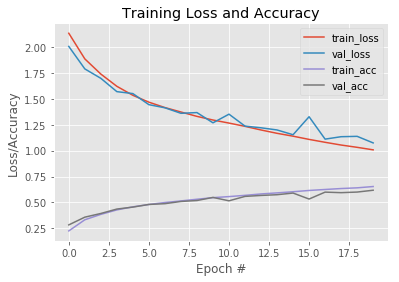

In [0]:
# evaluate the network
print("[INFO] evaluating network...")

# get predictions on the test set
predictions = model.predict(x_test, batch_size=128)

# define text labels (source: https://www.cs.toronto.edu/~kriz/cifar.html)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog',
                  'horse', 'ship', 'truck']


print(classification_report(y_test.argmax(axis=1),
predictions.argmax(axis=1),
target_names=cifar10_labels))

# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 20), hist.history["loss"], label="train_loss" )
plt.plot(np.arange(0, 20), hist.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 20), hist.history["acc" ], label="train_acc" )
plt.plot(np.arange(0, 20), hist.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

## Modelo MiniVGG

In [0]:
from keras.layers.normalization import BatchNormalization
from keras.layers.core import Dropout

def build_MiniVGG(width, height, depth, classes):
  # initialize the model
  model = Sequential()
  inputShape = (height, width, depth)# first CONV => RELU => CONV => RELU => POOL layer set
  model.add(Conv2D(32, (3, 3), padding="same",
  input_shape=inputShape))
  model.add(Activation("relu"))
  model.add(BatchNormalization(axis=2))
  model.add(Conv2D(32, (3, 3), padding="same"))
  model.add(Activation("relu"))
  model.add(BatchNormalization(axis=2))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
  
  # second CONV => RELU => CONV => RELU => POOL layer set
  model.add(Conv2D(64, (3, 3), padding="same"))
  model.add(Activation("relu"))
  model.add(BatchNormalization(axis=2))
  model.add(Conv2D(64, (3, 3), padding="same"))
  model.add(Activation("relu"))
  model.add(BatchNormalization(axis=2))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
  
  # first (and only) set of FC => RELU layers
  model.add(Flatten())
  model.add(Dense(512))
  model.add(Activation("relu"))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  
  # softmax classifier
  model.add(Dense(classes))
  model.add(Activation("softmax"))
  
  model.summary()
  
  # return the constructed network architecture
  return model
  

### 5. Compile o modelo 

In [0]:
opt = SGD(lr=0.01)
model = build_MiniVGG(width=32, height=32, depth=3, classes=10)
model.compile(loss='categorical_crossentropy', optimizer=opt, 
                  metrics=['accuracy'])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_9 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_10 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 32)        128       
___________________________

### 6. Treine o Modelo

In [0]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.minivgg.hdf5', verbose=1, 
                               save_best_only=True)
hist = model.fit(x_train, y_train, batch_size=128, epochs=20,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/20
 - 12s - loss: 2.3434 - acc: 0.2682 - val_loss: 1.5887 - val_acc: 0.4338

Epoch 00001: val_loss improved from inf to 1.58867, saving model to model.weights.best.minivgg.hdf5
Epoch 2/20
 - 10s - loss: 1.7504 - acc: 0.3927 - val_loss: 1.4603 - val_acc: 0.4828

Epoch 00002: val_loss improved from 1.58867 to 1.46035, saving model to model.weights.best.minivgg.hdf5
Epoch 3/20
 - 10s - loss: 1.5336 - acc: 0.4557 - val_loss: 1.3968 - val_acc: 0.4968

Epoch 00003: val_loss improved from 1.46035 to 1.39679, saving model to model.weights.best.minivgg.hdf5
Epoch 4/20
 - 10s - loss: 1.4017 - acc: 0.5003 - val_loss: 1.2989 - val_acc: 0.5334

Epoch 00004: val_loss improved from 1.39679 to 1.29894, saving model to model.weights.best.minivgg.hdf5
Epoch 5/20
 - 10s - loss: 1.3070 - acc: 0.5325 - val_loss: 1.2286 - val_acc: 0.5582

Epoch 00005: val_loss improved from 1.29894 to 1.22856, saving model to model.weights.best.minivgg.hdf5
Epoch 6/20

### 7. Carrege o modelo com a melhor acurácia no conjunto de validação

In [0]:
# load the weights that yielded the best validation accuracy
model.load_weights('model.weights.best.minivgg.hdf5')

### 8. Calcule a acurácia no conjunto de teste

In [0]:
# evaluate and print test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.71


### 9. Informações sobre acurácia no treinamento

[INFO] evaluating network...
              precision    recall  f1-score   support

    airplane       0.80      0.68      0.74      1000
  automobile       0.89      0.80      0.84      1000
        bird       0.70      0.47      0.57      1000
         cat       0.61      0.40      0.48      1000
        deer       0.53      0.80      0.64      1000
         dog       0.67      0.57      0.62      1000
        frog       0.66      0.87      0.75      1000
       horse       0.77      0.77      0.77      1000
        ship       0.78      0.88      0.83      1000
       truck       0.78      0.84      0.81      1000

   micro avg       0.71      0.71      0.71     10000
   macro avg       0.72      0.71      0.70     10000
weighted avg       0.72      0.71      0.70     10000



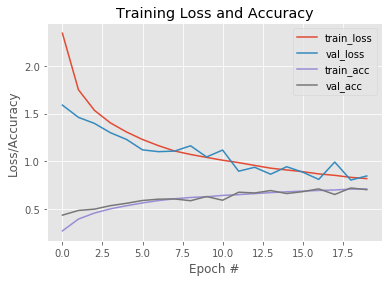

In [0]:
# evaluate the network
print("[INFO] evaluating network...")

# get predictions on the test set
predictions = model.predict(x_test, batch_size=128)

# define text labels (source: https://www.cs.toronto.edu/~kriz/cifar.html)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog',
                  'horse', 'ship', 'truck']


print(classification_report(y_test.argmax(axis=1),
predictions.argmax(axis=1),
target_names=cifar10_labels))

# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 20), hist.history["loss"], label="train_loss" )
plt.plot(np.arange(0, 20), hist.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 20), hist.history["acc" ], label="train_acc" )
plt.plot(np.arange(0, 20), hist.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

##Exercício

1. Compare a arquitetura criada MiniVGG com a VGG16. Quais são as principais diferenças? Formule uma nova arquitetura VGG16.

2. Compare a arquitetura criada LENET com a AlexNet. Quais são as principais diferenças? Formule uma nova arquitetura da AlexNet.





---

Resposta:

1.   A **MiniVGG** implementada possui duas camadas convolutivas com 32 filtros, antes da verdadeira camada inicial proposta pela **VGG16**, que seria com 64 filtros. A segunda diferença que pode ser observada, é a ausência das camadas convolutivas maiores de 128, 256, 512 filtros e das camadas totalmente conectadas antes da camada de output. Além disso, no **MiniVGG** foi utilizado camadas de bachnormalization após as camadas de convolução. Tirando esses fatores, a **MiniVGG** possui o mesmo tipo de distribuição das camadas da **VGG16**, que são CONV > CONV > POLL > CONV > CONV > POLL > FC > FC


2.   Na arquitetura **LENET** as camadas estão distribuidas da seguinte forma: CONV > POLL > CONV > POLL > FC > FC, possuindo assim no total 8 camadas (contando com o input e o output). Enquanto que na arquitetura **AlexNet** a distribuição ocorre: CONV > POLL > NORM > CONV > POLL > NORM > CONV > CONV > CONV > POLL > FC > FC > FC, no total 15 camadas (contando com o input e o output).
 Além de uma distribuição diferente de camadas, é observado que na **LENET** o número de filtros convolutivos vão aumentando aos poucos, saindo de 20 filtros de tamanho 5x5, para 50 filtros de tamanho 5x5. Diferente do **AlexNet** que inicia sua arquitetura com 96 filtros de tamanho 55x55 e após isso, ocorreu um aumento na quantidade de filtros mas uma redução no tamanho dos filtros.
 Por fim, dado esses fatores e sabendo-se que também é utilizado data augmentation e dropout, pode-se afirmar que a arquitetura **AlexNet** alcançará provavelmente melhores resultados que a **LENET**, além de possuir menos overfitting.


### NewMiniVGG

In [0]:
from keras.layers.normalization import BatchNormalization
from keras.layers.core import Dropout

def build_NewMiniVGG(width, height, depth, classes):
  # initialize the model
  model = Sequential()
  inputShape = (height, width, depth)# first CONV => RELU => CONV => RELU => POOL layer set
  model.add(Conv2D(64, (3, 3), padding="same",
  input_shape=inputShape))
  model.add(Activation("relu"))
  model.add(BatchNormalization(axis=2))
  model.add(Conv2D(64, (3, 3), padding="same"))
  model.add(Activation("relu"))
  model.add(BatchNormalization(axis=2))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
  
  # second CONV => RELU => CONV => RELU => POOL layer set
  model.add(Conv2D(128, (3, 3), padding="same"))
  model.add(Activation("relu"))
  model.add(BatchNormalization(axis=2))
  model.add(Conv2D(128, (3, 3), padding="same"))
  model.add(Activation("relu"))
  model.add(BatchNormalization(axis=2))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
  
  # third CONV => RELU => CONV => RELU => CONV => RELU => POOL layer set
  model.add(Conv2D(512, (3, 3), padding="same"))
  model.add(Activation("relu"))
  model.add(BatchNormalization(axis=2))
  model.add(Conv2D(512, (3, 3), padding="same"))
  model.add(Activation("relu"))
  model.add(BatchNormalization(axis=2))
  model.add(Conv2D(512, (3, 3), padding="same"))
  model.add(Activation("relu"))
  model.add(BatchNormalization(axis=2))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
  
  # first (and only) set of FC => RELU layers
  model.add(Flatten())
  model.add(Dense(512))
  model.add(Activation("relu"))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  
  # softmax classifier
  model.add(Dense(classes))
  model.add(Activation("softmax"))
  
  model.summary()
  
  # return the constructed network architecture
  return model

#### 5. Compile o modelo

In [0]:
opt = SGD(lr=0.01)
model = build_NewMiniVGG(width=32, height=32, depth=3, classes=10)
model.compile(loss='categorical_crossentropy', optimizer=opt, 
                  metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
activation_15 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 32, 32, 64)        128       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
activation_16 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 32, 32, 64)        128       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 64)        0         
__________

#### 6. Treine o Modelo

In [0]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.newvgg.hdf5', verbose=1, 
                               save_best_only=True)
hist = model.fit(x_train, y_train, batch_size=128, epochs=20,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/20
 - 39s - loss: 2.2782 - acc: 0.2660 - val_loss: 1.9529 - val_acc: 0.2932

Epoch 00001: val_loss improved from inf to 1.95293, saving model to model.weights.best.newvgg.hdf5
Epoch 2/20
 - 35s - loss: 1.6813 - acc: 0.4142 - val_loss: 1.4688 - val_acc: 0.4912

Epoch 00002: val_loss improved from 1.95293 to 1.46878, saving model to model.weights.best.newvgg.hdf5
Epoch 3/20
 - 35s - loss: 1.4226 - acc: 0.4978 - val_loss: 1.2882 - val_acc: 0.5460

Epoch 00003: val_loss improved from 1.46878 to 1.28823, saving model to model.weights.best.newvgg.hdf5
Epoch 4/20
 - 35s - loss: 1.2433 - acc: 0.5580 - val_loss: 1.0813 - val_acc: 0.6186

Epoch 00004: val_loss improved from 1.28823 to 1.08130, saving model to model.weights.best.newvgg.hdf5
Epoch 5/20
 - 35s - loss: 1.1045 - acc: 0.6091 - val_loss: 1.1097 - val_acc: 0.6130

Epoch 00005: val_loss did not improve from 1.08130
Epoch 6/20
 - 35s - loss: 1.0055 - acc: 0.6423 - val_loss: 0.9478 -

#### 7. Carrege o modelo com a melhor acurácia no conjunto de validação

In [0]:
# load the weights that yielded the best validation accuracy
model.load_weights('model.weights.best.newvgg.hdf5')

#### 8. Calcule a acurácia no conjunto de teste

In [0]:
# evaluate and print test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.7953


#### 9. Informações sobre acurácia no treinamento

[INFO] evaluating network...
              precision    recall  f1-score   support

    airplane       0.80      0.84      0.82      1000
  automobile       0.92      0.88      0.90      1000
        bird       0.79      0.66      0.72      1000
         cat       0.56      0.71      0.63      1000
        deer       0.79      0.78      0.79      1000
         dog       0.66      0.76      0.71      1000
        frog       0.84      0.83      0.83      1000
       horse       0.89      0.80      0.84      1000
        ship       0.87      0.89      0.88      1000
       truck       0.93      0.82      0.87      1000

   micro avg       0.80      0.80      0.80     10000
   macro avg       0.81      0.80      0.80     10000
weighted avg       0.81      0.80      0.80     10000



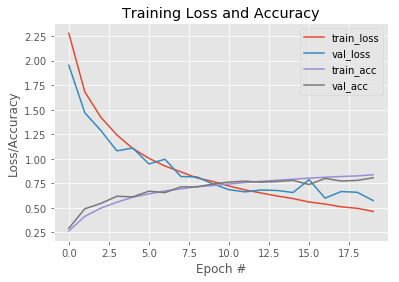

In [0]:
# evaluate the network
print("[INFO] evaluating network...")

# get predictions on the test set
predictions = model.predict(x_test, batch_size=128)

# define text labels (source: https://www.cs.toronto.edu/~kriz/cifar.html)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog',
                  'horse', 'ship', 'truck']


print(classification_report(y_test.argmax(axis=1),
predictions.argmax(axis=1),
target_names=cifar10_labels))

# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 20), hist.history["loss"], label="train_loss" )
plt.plot(np.arange(0, 20), hist.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 20), hist.history["acc" ], label="train_acc" )
plt.plot(np.arange(0, 20), hist.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

### NewAlexNet

In [0]:
from keras.layers.normalization import BatchNormalization
from keras.layers.core import Dropout

def build_NewAlexNet(width, height, depth, classes):
  # initialize the model
  model = Sequential()
  inputShape = (height, width, depth)
  model.add(Conv2D(32, (3, 3), input_shape=inputShape))
  model.add(Activation("relu"))
  model.add(BatchNormalization(axis=2))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(32, (3, 3)))
  model.add(Activation("relu"))
  model.add(BatchNormalization(axis=2))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
  
  
  model.add(Conv2D(128, (3, 3)))
  model.add(Activation("relu"))
  model.add(BatchNormalization(axis=2))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(128, (3, 3)))
  model.add(Activation("relu"))
  model.add(BatchNormalization(axis=2))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
  
  
  model.add(Conv2D(64, (3, 3)))
  model.add(Activation("relu"))
  model.add(BatchNormalization(axis=2))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
  
  # first (and only) set of FC => RELU layers
  model.add(Flatten())
  model.add(Dense(1024))
  model.add(Activation("relu"))
  model.add(BatchNormalization())
  model.add(Dense(512))
  model.add(Activation("relu"))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  
  # softmax classifier
  model.add(Dense(classes))
  model.add(Activation("softmax"))
  
  model.summary()
  
  # return the constructed network architecture
  return model

#### 5. Compile o modelo

In [46]:
opt = SGD(lr=0.01)
model = build_NewAlexNet(width=32, height=32, depth=3, classes=10)
model.compile(loss='categorical_crossentropy', optimizer=opt, 
                  metrics=['accuracy'])

ValueError: ignored

#### 6. Treine o Modelo

In [0]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.newalexnet.hdf5', verbose=1, 
                               save_best_only=True)
hist = model.fit(x_train, y_train, batch_size=128, epochs=20,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

#### 7. Carrege o modelo com a melhor acurácia no conjunto de validação

In [0]:
# load the weights that yielded the best validation accuracy
model.load_weights('model.weights.best.newalexnet.hdf5')

#### 8. Calcule a acurácia no conjunto de teste

In [0]:
# evaluate and print test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])

#### 9. Informações sobre acurácia no treinamento

In [0]:
# evaluate the network
print("[INFO] evaluating network...")

# get predictions on the test set
predictions = model.predict(x_test, batch_size=128)

# define text labels (source: https://www.cs.toronto.edu/~kriz/cifar.html)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog',
                  'horse', 'ship', 'truck']


print(classification_report(y_test.argmax(axis=1),
predictions.argmax(axis=1),
target_names=cifar10_labels))

# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 20), hist.history["loss"], label="train_loss" )
plt.plot(np.arange(0, 20), hist.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 20), hist.history["acc" ], label="train_acc" )
plt.plot(np.arange(0, 20), hist.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()